In [2]:
# Import Keras Packages
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
Matplotlib is building the font cache using fc-list. This may take a moment.


In [6]:
# Initializing CNN Layers
model = Sequential()

In [7]:
# First Convolution
# 64 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
model.add(Conv2D(64, kernel_size=(3, 3), input_shape = (150, 150, 3), activation = 'relu'))

In [8]:
# Max Pooling Layer 2x2
model.add(AveragePooling2D(pool_size = (2, 2)))

In [9]:
# Second Convolution
# 32 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
#model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))

In [10]:
# Max Pooling Layer 2x2
model.add(AveragePooling2D(pool_size = (2, 2)))

In [11]:
model.add(Flatten())

In [12]:
# Fully Connecting Layer
model.add(Dense(128, activation = 'relu'))

# Return a categorical outcome
model.add(Dense(3, activation = 'softmax'))

In [13]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/seg_train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/seg_test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7057 images belonging to 3 classes.
Found 1509 images belonging to 3 classes.


In [15]:
model.fit_generator(training_set,
                         steps_per_epoch = 850,
                         epochs = 10,
                         validation_data = test_set)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
221/221 [==============================] - 303s 1s/step - loss: 0.5996 - acc: 0.7213 - val_loss: 0.5706 - val_acc: 0.7290
Epoch 2/10
221/221 [==============================] - 302s 1s/step - loss: 0.4610 - acc: 0.7965 - val_loss: 0.3634 - val_acc: 0.8390
Epoch 3/10
221/221 [==============================] - 294s 1s/step - loss: 0.3837 - acc: 0.8358 - val_loss: 0.3673 - val_acc: 0.8423
Epoch 4/10
221/221 [==============================] - 305s 1s/step - loss: 0.3627 - acc: 0.8512 - val_loss: 0.3595 - val_acc: 0.8535
Epoch 5/10
221/221 [==============================] - 292s 1s/step - loss: 0.3469 - acc: 0.8522 - val_loss: 0.3558 - val_acc: 0.8741
Epoch 6/10
221/221 [==============================] - 290s 1s/step - loss: 0.3016 - acc: 0.8807 - val_loss: 0.2644 - val_acc: 0.9019
Epoch 7/10
221/221 [==============================] - 300s 1s/step - loss: 0.2834 - acc: 0.8856 - val_loss: 0.2636 - val_acc: 0.8993
Epoch 8/10
221/221 [=

In [1]:
epoch = [1,2,3,4,5,6,7,8,9,10]
loss = [0.5996, 0.4610, 0.3837, 0.3627, 0.3469, 0.3016, 0.2834, 0.2604, 0.2394, 0.2207]
accuracies = [0.7290, 0.8390, 0.8423, 0.8535, 0.8741, 0.9019, 0.8993, 0.9125, 0.9059, 0.9145]

Text(0.5, 1.0, 'Loss Plot (Avg)')

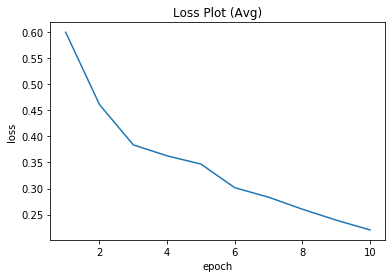

In [7]:
plt.plot(epoch, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Plot (Avg)')

Text(0.5, 1.0, 'Accuracies Plot (Avg)')

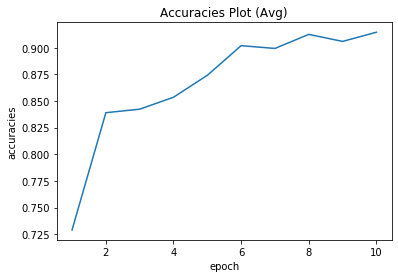

In [8]:
plt.plot(epoch, accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('Accuracies Plot (Avg)')